In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

    

In [ ]:

import requests
import pandas as pd
import io

# URL of the CSV file

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Fetching the CSV file
response = requests.get(URL)
# Ensure the request was successful
if response.status_code == 200:
    # Read the CSV file into a pandas DataFrame
    data= pd.read_csv(io.StringIO(response.text))
    print('Data read into a pandas dataframe!')
    # Display the first few rows of the DataFrame
    print(data.head())
else:
    print(f"Failed to fetch the CSV file. Status code: {response.status_code}")

Data read into a pandas dataframe!
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0 

In [ ]:

import requests
import pandas as pd
import io

# URL of the CSV file

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# Fetching the CSV file
response = requests.get(URL2)
# Ensure the request was successful
if response.status_code == 200:
    # Read the CSV file into a pandas DataFrame
    X= pd.read_csv(io.StringIO(response.text))
    print('Data read into a pandas dataframe!')
    # Display the first few rows of the DataFrame
    print(X.head())
else:
    print(f"Failed to fetch the CSV file. Status code: {response.status_code}")



Data read into a pandas dataframe!
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0    

In [ ]:
Y=data['Class'].to_numpy()

In [ ]:
from sklearn import preprocessing

# Assuming X is already defined and contains your data
transform = preprocessing.StandardScaler()

# Fit the StandardScaler to the data
transform.fit(X)

# Transform the data and reassign it to X
X = transform.transform(X)


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

In [ ]:
Y_test.shape

(18,)

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train,Y_train)


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [ ]:
accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)
accuracy

0.8333333333333334

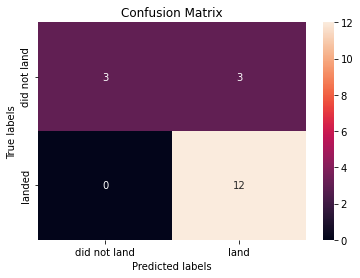

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [ ]:
parameters1 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters1, cv=10).fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print( "accuracy :",svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [ ]:
accuracy1 = svm_cv.best_estimator_.score(X_test, Y_test)
accuracy1

0.8333333333333334

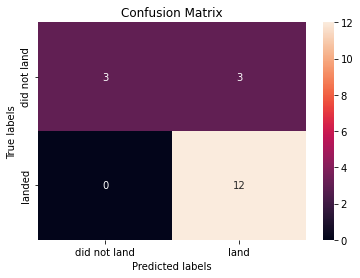

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10).fit(X_train,Y_train)


In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8767857142857143


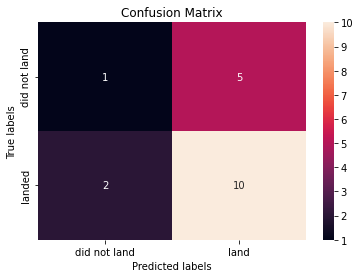

In [ ]:
accuracy2 = tree_cv.best_estimator_.score(X_test, Y_test)
accuracy2
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10).fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


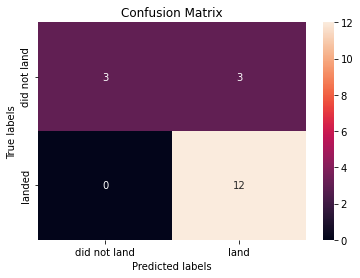

In [ ]:
accuracy3 = knn_cv.best_estimator_.score(X_test, Y_test)
accuracy3
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
report = pd.DataFrame(
    {
        "names": ["logistic", "tree", "svm", "knn"],
        "values": [logreg_cv.best_score_,tree_cv.best_score_ ,svm_cv.best_score_,knn_cv.best_score_],
    }
)
print(report)

      names    values
0  logistic  0.846429
1      tree  0.876786
2       svm  0.848214
3       knn  0.848214


In [ ]:
report

,names,values
0,logistic,0.846429
1,tree,0.876786
2,svm,0.848214
3,knn,0.848214


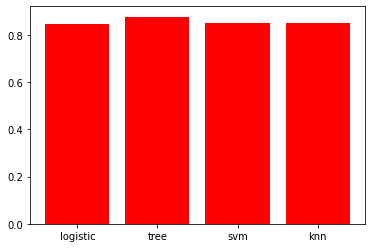

In [ ]:
plt.bar(x=report["names"], height=report["values"], color="red")
plt.show()